In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
from datetime import datetime

# Set seaborn style and matplotlib configurations
sns.set_style("whitegrid")  # This replaces plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline

# Optional: Set figure size defaults
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [105]:


# Read the CSV file
df = pd.read_csv('../data/modern_english_books.csv')

# Display column names
print("Available columns in the dataset:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst few rows of data:")
print(df.head())

Available columns in the dataset:
['title', 'author_name', 'first_publish_year', 'subject', 'cover_i', 'subject_count', 'decade']

First few rows of data:
                                               title  \
0                              Butterflies and Moths   
1  "The work of the Committee of the institution ...   
2                    Garbage--the crisis of the 80's   
3  Preston Lee's 2-In-1 Book Series! Beginner Eng...   
4                                                  .   

                                         author_name  first_publish_year  \
0                             Dorothy Hinshaw Patent                1979   
1                             Stephen Mitchell Dixon                1930   
2  California Solid Waste Management Board. Offic...                1982   
3                                    Matthew Preston                2020   
4                                                NaN                1992   

                                             subjec

In [57]:
# Examine the publishing volume data
print("Books published per decade:")
decade_counts = volume_trends.sort_index()
print(decade_counts)

# Optional: Calculate some statistics
print("\nPublishing volume statistics:")
print(f"Peak decade: {decade_counts.idxmax()} with {decade_counts.max():,} books")
print(f"Lowest decade: {decade_counts.idxmin()} with {decade_counts.min():,} books")
print(f"Average books per decade: {decade_counts.mean():,.0f}")

Books published per decade:
decade
1900     119
1910     103
1920     141
1930     155
1940     175
1950     225
1960     428
1970     710
1980     934
1990    1166
2000    1574
2010    2837
2020    1433
Name: count, dtype: int64

Publishing volume statistics:
Peak decade: 2010 with 2,837 books
Lowest decade: 1910 with 103 books
Average books per decade: 769


In [120]:
class LibraryDataAnalyzer:
    def __init__(self, file_path):
        """Initialize the analyzer with data file path."""
        self.df = self._load_and_clean_data(file_path)
        if self.df is None:
            raise ValueError("Failed to load data")
        print(f"Loaded {len(self.df)} records")
        
    def _load_and_clean_data(self, file_path):
        """Load and clean the dataset."""
        try:
            print(f"Loading data from {file_path}")
            df = pd.read_csv(file_path)
            print(f"Initial data shape: {df.shape}")
            
            df = self._clean_publication_years(df)
            print(f"After cleaning years: {df.shape}")
            
            df = self._clean_subjects(df)
            print(f"After cleaning subjects: {df.shape}")
            
            return df
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return None

    def _clean_publication_years(self, df):
        """Clean and validate publication years."""
        try:
            df['first_publish_year'] = pd.to_numeric(df['first_publish_year'], errors='coerce')
            
            current_year = 2022
            df = df[
                (df['first_publish_year'] >= 1900) & 
                (df['first_publish_year'] <= current_year)
            ]
            
            if 'decade' not in df.columns:
                df['decade'] = (df['first_publish_year'] // 10) * 10
            
            return df
        except Exception as e:
            print(f"Error cleaning years: {str(e)}")
            return None

    def _clean_subjects(self, df):
        """Clean and process subject/genre information."""
        try:
            print("Starting subject cleaning...")
            
            GENRE_MAPPING = {
                # Youth Literature
                'juvenile fiction': "Children's Literature",
                'children\'s fiction': "Children's Literature",
                'juvenile literature': "Children's Literature",
                'picture books': "Children's Literature",
                'middle grade': "Children's Literature",
                'children\'s stories': "Children's Literature",
                'children\'s books': "Children's Literature",
                
                # Young Adult
                'young adult fiction': "Young Adult Literature",
                'ya fiction': "Young Adult Literature",
                'teen fiction': "Young Adult Literature",
                'teen literature': "Young Adult Literature",
                
                # General Fiction
                'fiction': "Fiction",
                'novels': "Fiction",
                'short stories': "Fiction",
                
                'congresses': None,
                'proceedings': None,
                'dissertations': None
            }
            
            FORMAT_CATEGORIES = {
                'congresses',
                'proceedings',
                'periodicals',
                'dissertations',
                'papers',
                'reports',
                'abstracts',
                'indexes'
            }
            
            def clean_subject_list(subjects):
                if isinstance(subjects, str):
                    try:
                        subject_list = literal_eval(subjects)
                    except:
                        return []
                elif isinstance(subjects, list):
                    subject_list = subjects
                else:
                    return []
                    
                cleaned = []
                for subject in subject_list:
                    subject_lower = subject.lower().strip()
                    if any(format_cat in subject_lower for format_cat in FORMAT_CATEGORIES):
                        continue
                    mapped_subject = GENRE_MAPPING.get(subject_lower, subject)
                    if mapped_subject:
                        cleaned.append(mapped_subject)
                return list(set(cleaned))
            
            df['subjects_cleaned'] = df['subject'].apply(clean_subject_list)
            return df
            
        except Exception as e:
            print(f"Error in clean_subjects: {str(e)}")
            print(f"Current columns: {df.columns.tolist()}")
            raise

    def analyze_publishing_volume(self):
        """Analyze publishing volume trends by decade."""
        decade_counts = self.df['decade'].value_counts().sort_index()
        
        plt.figure(figsize=(15, 7))
        plt.plot(decade_counts.index, decade_counts.values, marker='o', linewidth=2)
        
        plt.title('Book Publishing Volume by Decade (1900-2022)', pad=20, fontsize=14)
        plt.xlabel('Decade', fontsize=12)
        plt.ylabel('Number of Books Published', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        for x, y in zip(decade_counts.index, decade_counts.values):
            plt.text(x, y + max(decade_counts.values)*0.02, f'{y:,}', 
                    ha='center', va='bottom')
        
        plt.xticks(decade_counts.index, rotation=45)
        plt.tight_layout()
        plt.show()
        
        return decade_counts

    def analyze_historical_events_impact(self):
        """Analyze yearly publishing patterns around major historical events."""
        yearly_counts = self.df['first_publish_year'].value_counts().sort_index()
        
        events = {
            1914: 'WWI Start',
            1918: 'WWI End',
            1929: 'Great Depression',
            1939: 'WWII Start',
            1945: 'WWII End',
            2001: '9/11',
            2008: 'Financial Crisis',
            2020: 'COVID-19'
        }
        
        plt.figure(figsize=(15, 7))
        plt.plot(yearly_counts.index, yearly_counts.values, linewidth=1)
        
        for year, event in events.items():
            if year in yearly_counts.index:
                plt.axvline(x=year, color='r', linestyle='--', alpha=0.3)
                plt.text(year, plt.ylim()[1], event, 
                        rotation=90, va='top', ha='right')
        
        plt.title('Yearly Publishing Volume with Major Historical Events', pad=20, fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Books Published', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.show()
        
        return yearly_counts

    def analyze_genre_trends(self, start_year=2000):
        """Analyze genre distribution changes in the 21st century."""
        modern_df = self.df[self.df['first_publish_year'] >= start_year].copy()
        subjects_df = modern_df.explode('subjects_cleaned')
        
        top_subjects = subjects_df['subjects_cleaned'].value_counts().head(10)
        
        yearly_subject_counts = subjects_df[
            subjects_df['subjects_cleaned'].isin(top_subjects.index)
        ].pivot_table(
            index='first_publish_year',
            columns='subjects_cleaned',
            aggfunc='size',
            fill_value=0
        )
        
        plt.figure(figsize=(15, 8))
        for subject in yearly_subject_counts.columns:
            plt.plot(yearly_subject_counts.index, 
                    yearly_subject_counts[subject], 
                    label=subject, linewidth=2)
        
        plt.title(f'Genre Trends Since {start_year}', pad=20, fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Books', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        return yearly_subject_counts

    def analyze_growth_rates(self):
        """Analyze decade-over-decade growth rates in publishing."""
        decade_counts = self.df['decade'].value_counts().sort_index()
        growth_rates = decade_counts.pct_change() * 100
        
        plt.figure(figsize=(15, 7))
        plt.bar(growth_rates.index, growth_rates.values, color='skyblue')
        
        plt.title('Decade-over-Decade Growth Rate in Publishing (%)', pad=20, fontsize=14)
        plt.xlabel('Decade', fontsize=12)
        plt.ylabel('Growth Rate (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        for x, y in zip(growth_rates.index, growth_rates.values):
            plt.text(x, y + (1 if y >= 0 else -1), 
                    f'{y:.1f}%', ha='center', va='bottom')
        
        plt.xticks(growth_rates.index, rotation=45)
        plt.tight_layout()
        plt.show()
        
        return growth_rates

    def analyze_genre_diversity(self, start_year=1900):
        """Analyze how genre diversity has changed over time."""
        genre_diversity = self.df[self.df['first_publish_year'] >= start_year].groupby('decade').agg({
            'subjects_cleaned': lambda x: len(set([item for sublist in x for item in sublist])),
            'first_publish_year': 'count'
        }).rename(columns={
            'subjects_cleaned': 'Unique Genres',
            'first_publish_year': 'Total Books'
        })
        
        genre_diversity['Genres per 1000 Books'] = (genre_diversity['Unique Genres'] / 
                                                   genre_diversity['Total Books'] * 1000)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
        
        ax1.plot(genre_diversity.index, genre_diversity['Unique Genres'], 
                 marker='o', linewidth=2)
        ax1.set_title('Number of Unique Genres by Decade')
        ax1.set_xlabel('Decade')
        ax1.set_ylabel('Number of Unique Genres')
        ax1.grid(True, alpha=0.3)
        
        ax2.plot(genre_diversity.index, genre_diversity['Genres per 1000 Books'], 
                 marker='o', linewidth=2, color='orange')
        ax2.set_title('Genre Diversity Relative to Publishing Volume')
        ax2.set_xlabel('Decade')
        ax2.set_ylabel('Genres per 1000 Books')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return genre_diversity


Loading data from ../data/modern_english_books.csv
Initial data shape: (10000, 7)
After cleaning years: (10000, 7)
Starting subject cleaning...
After cleaning subjects: (10000, 8)
Loaded 10000 records
Analyzing growth rates...


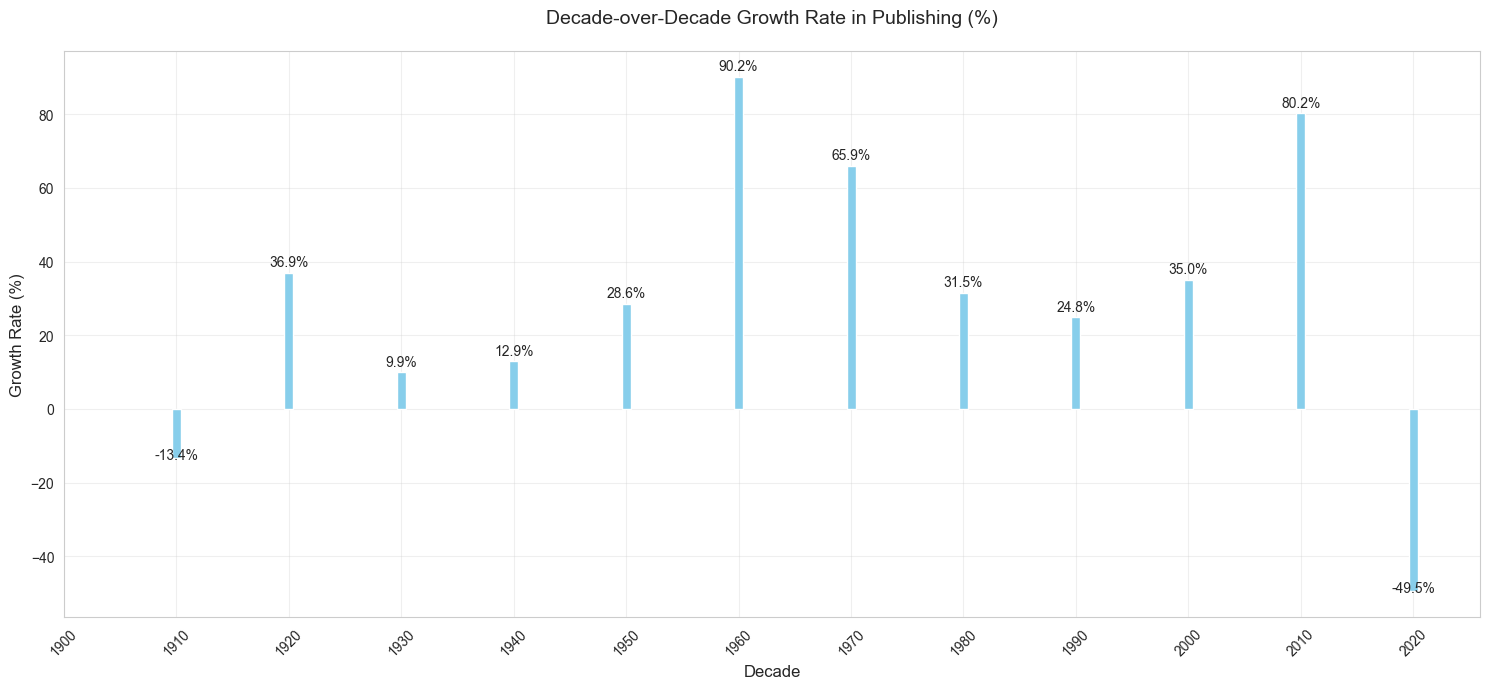


Analyzing genre diversity...


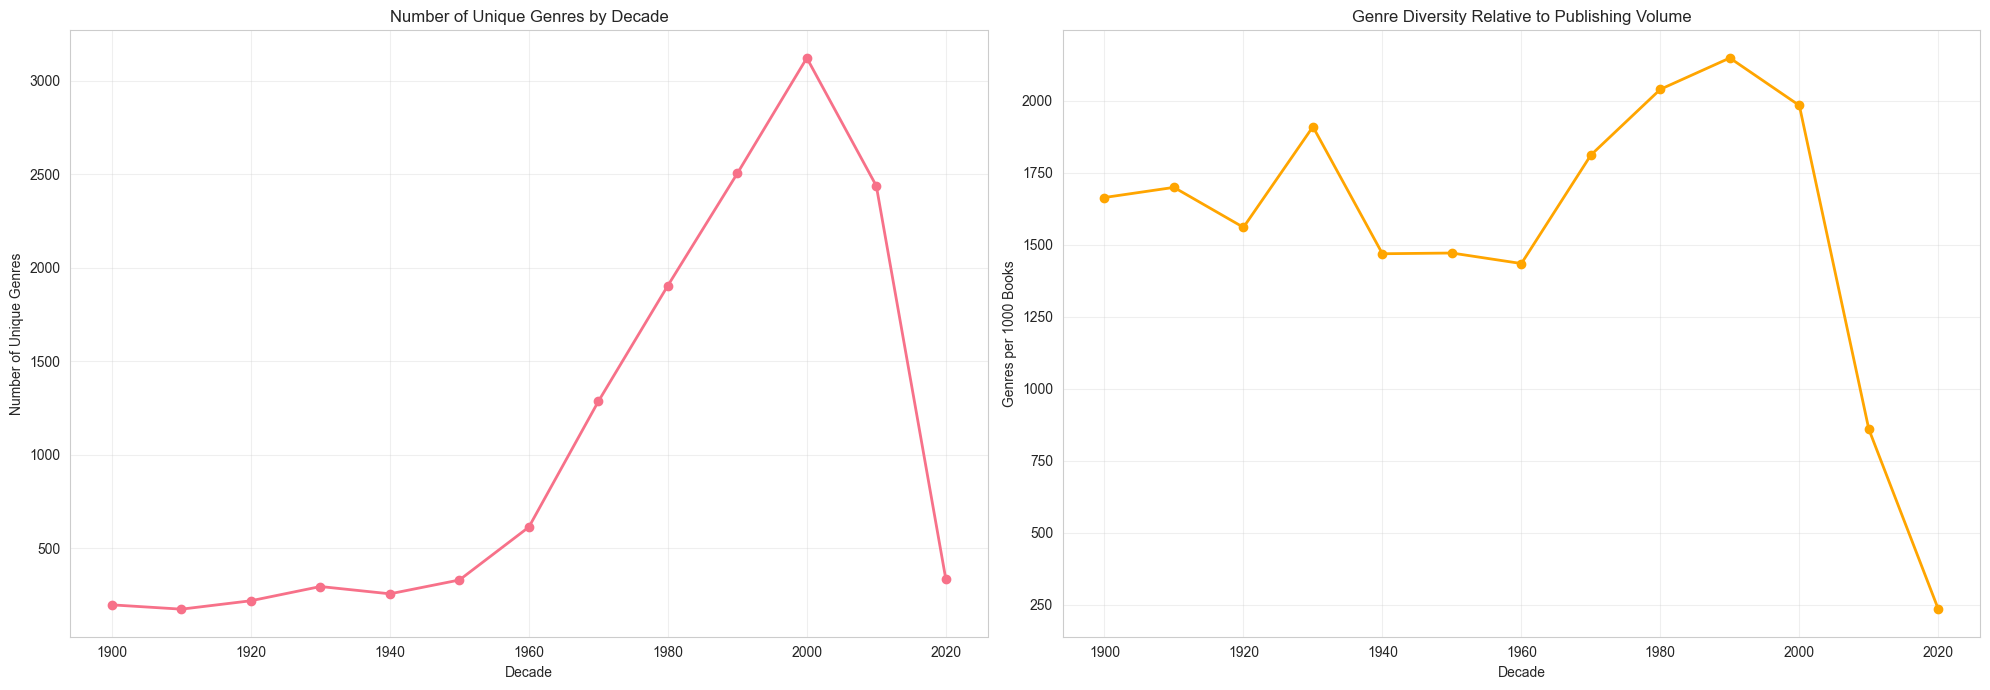


Analyzing historical events impact...


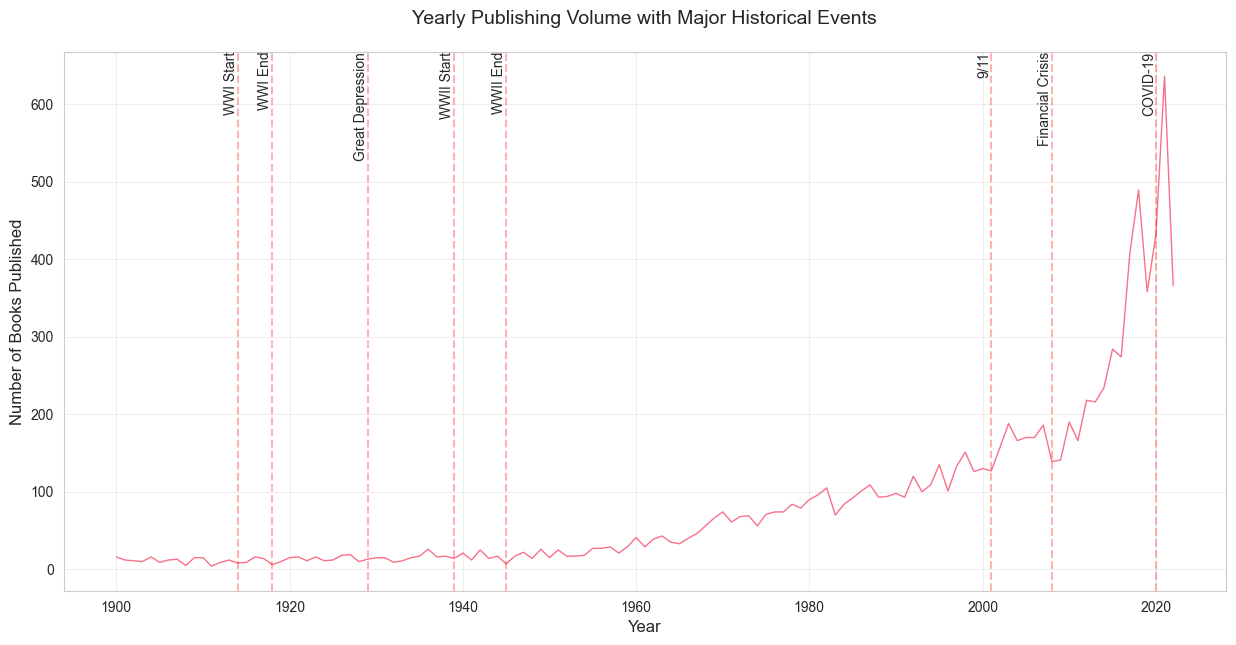


Key Findings:
Highest growth rate: 90.2% in decade 1960
Most diverse decade: 2000 with 3122 unique genres


In [121]:
# Create analyzer instance
analyzer = LibraryDataAnalyzer('../data/modern_english_books.csv')

# Run all analyses
print("Analyzing growth rates...")
growth_rates = analyzer.analyze_growth_rates()

print("\nAnalyzing genre diversity...")
genre_diversity = analyzer.analyze_genre_diversity()

print("\nAnalyzing historical events impact...")
historical_events = analyzer.analyze_historical_events_impact()

# Print key findings
print("\nKey Findings:")
print(f"Highest growth rate: {growth_rates.max():.1f}% in decade {growth_rates.idxmax()}")
print(f"Most diverse decade: {genre_diversity['Unique Genres'].idxmax()} "
      f"with {genre_diversity['Unique Genres'].max()} unique genres")